In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model
%matplotlib inline
import seaborn as sns

In [2]:
df = pd.read_csv('table_8_offenses_known_to_law_enforcement_new_york_by_city_2013-cleaned - 13tbl8ny.csv')

In [3]:
df.head()

,City,Population,Violent crime,Murder and nonnegligent manslaughter,Rape (revised definition)1,Rape (legacy definition)2,Robbery,Aggravated assault,Property crime,Burglary,Larceny- theft,Motor vehicle theft,Arson3
0,Adams Village,"1,861",0,0.0,NaN,0,0,0,12,2,10,0,0.0
1,Addison Town and Village,"2,577",3,0.0,NaN,0,0,3,24,3,20,1,0.0
2,Akron Village,"2,846",3,0.0,NaN,0,0,3,16,1,15,0,0.0
3,Albany,"97,956",791,8.0,NaN,30,227,526,"4,090",705,"3,243",142,NaN
4,Albion Village,"6,388",23,0.0,NaN,3,4,16,223,53,165,5,NaN


Prepare this data to model with multivariable regression (including data cleaning if necessary) according to this specification:

$$ Property crime = \alpha + Population + Population^2 + Murder + Robbery$$
 
The 'population' variable is already set for you, but you will need to create the last three features. Robbery and Murder are currently continuous variables. For this model, please use these variables to create categorical features where values greater than 0 are coded 1, and values equal to 0 are coded 0. You'll use this data and model in a later assignment- for now, just write the code you need to get the data ready. Don't forget basic data cleaning procedures, either! Do some graphing to see if there are any anomalous cases, and decide how you want to deal with them.

In [4]:
list(df)

['City',
 'Population',
 'Violent\ncrime',
 'Murder and\nnonnegligent\nmanslaughter',
 'Rape\n(revised\ndefinition)1',
 'Rape\n(legacy\ndefinition)2',
 'Robbery',
 'Aggravated\nassault',
 'Property\ncrime',
 'Burglary',
 'Larceny-\ntheft',
 'Motor\nvehicle\ntheft',
 'Arson3']

In [6]:
# Make new column 
df['Robbery_2'] = np.where(df['Robbery'] == 0, 0, 1)

In [7]:
df['Murder and\nnonnegligent\nmanslaughter_2'] = np.where(df['Murder and\nnonnegligent\nmanslaughter'] > 0, 1, 0)

In [8]:
df['Population'] = df['Population'].str.replace(',', '').astype(float)

In [9]:
df['Population_2'] = df['Population'] **2

In [10]:
df['Property\ncrime'] = df['Property\ncrime'].str.replace(',', '').astype(float)

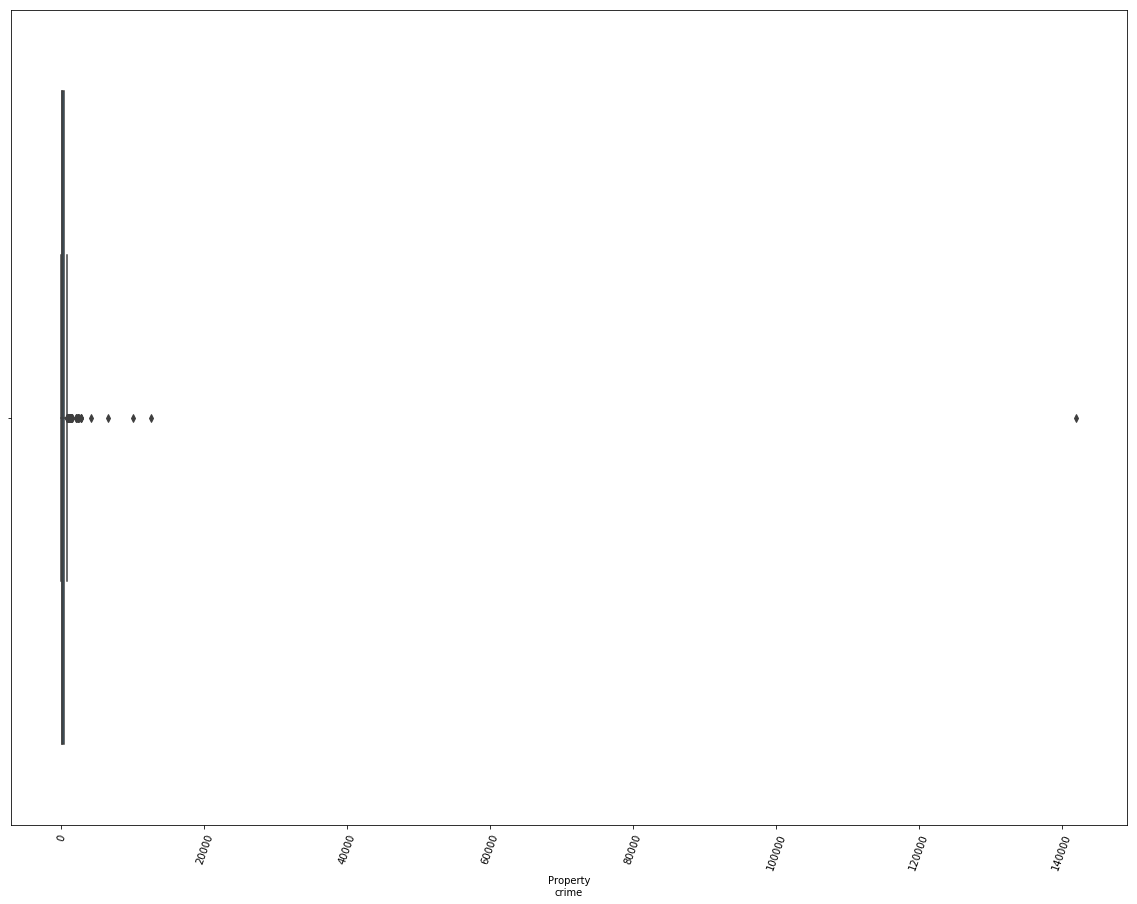

In [11]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Property\ncrime", data=df)
plt.xticks(rotation=70)
plt.show()

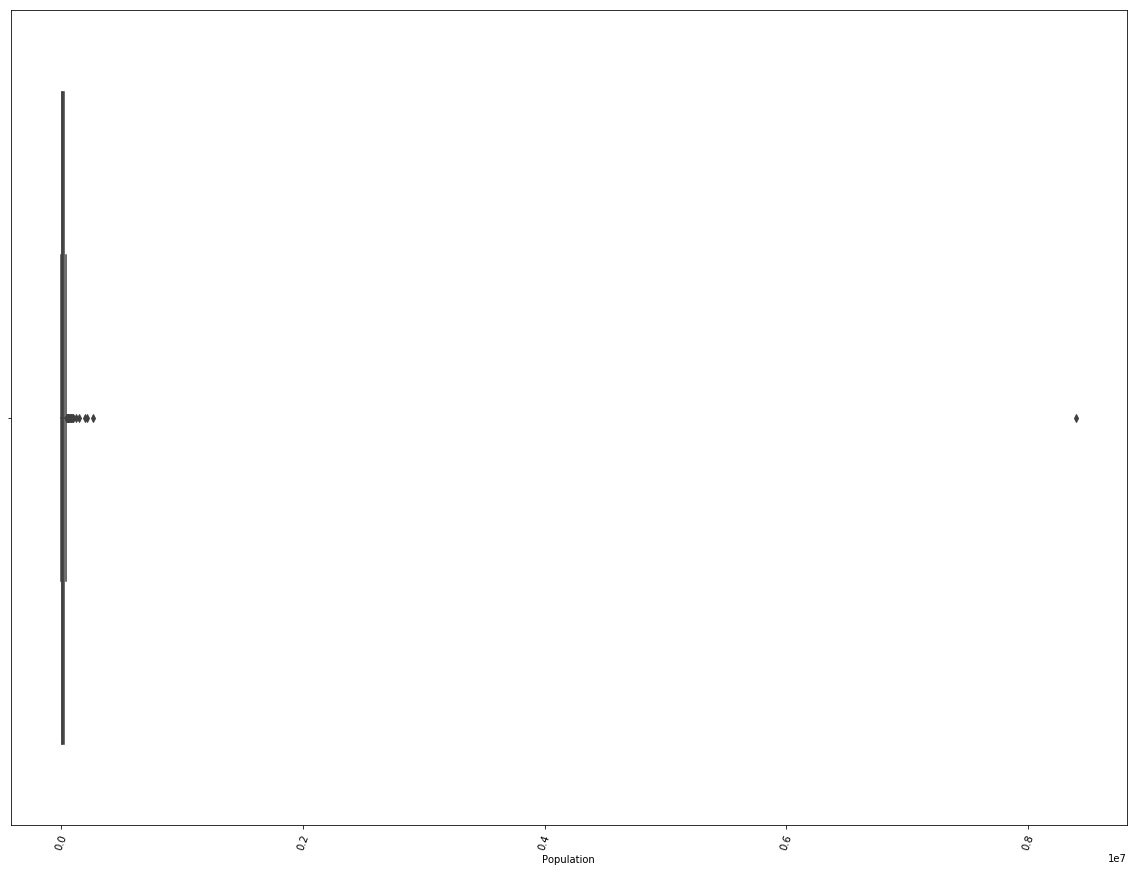

In [12]:
plt.figure(figsize=(20,15))
sns.boxplot(x="Population", data=df)
plt.xticks(rotation=70)
plt.show()

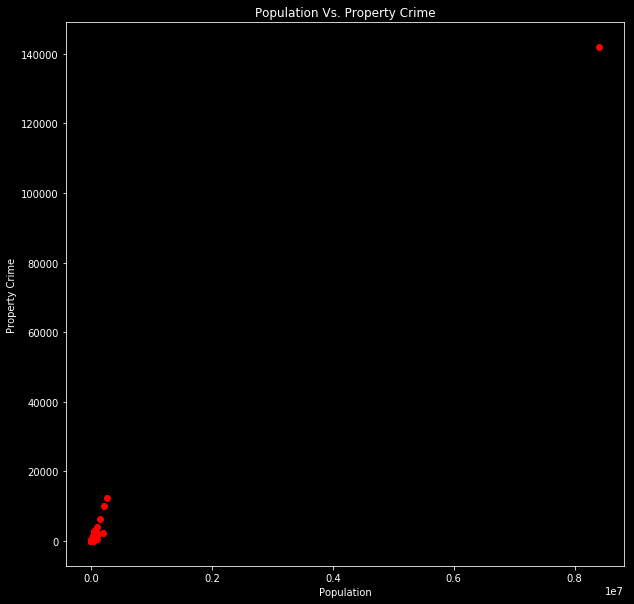

In [13]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(10,10))
    plt.scatter(x=df['Population'], y = df['Property\ncrime'], color = 'red' )
    plt.xlabel('Population')
    plt.ylabel('Property Crime')
    plt.title('Population Vs. Property Crime')
    plt.show()

In [14]:
#drop the outlier